##### import libary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

##### Read the FCGR data from excel for all the speceies in -log(X) scale truncated to four digit after decimel

In [3]:
df = pd.read_table('all speceies FCGR in -log(x) scale truncated to four decimel.txt', sep=",")

In [8]:
df

yeast    ecoli  zebra fish  fruit fly  nematoda  chimpanzee  \
0        12.9956  15.6195     10.4822    10.0645    9.6589     11.2989   
1        15.0105  15.6195     14.4527    13.4452   13.2299     13.1655   
2        15.0105  15.6195     14.8210    13.8411   14.1032     13.5929   
3        15.7037  15.6195     15.7300    15.1451   15.0666     14.7903   
4        15.7037  14.9263     14.7217    13.6889   14.8786     12.9886   
...          ...      ...         ...        ...       ...         ...   
1048571  10.4053  11.8818      9.6321    10.3067    9.9810     10.7049   
1048572  10.9162  13.8277      9.5320    10.2340    9.0261      9.9266   
1048573  10.4256  12.4840      9.7062    10.1025   10.2472     11.0090   
1048574  10.1624  14.5208      9.1085     9.6074    9.1974      9.7436   
1048575   8.0664  15.6195      7.3966     7.7160    8.2024      6.9607   

          gibbon  gorilla    mouse  orangutan    human  
0        12.3332  11.8167   9.7852    11.8277  12.3982  
1        14.1070  14.2258  12.2704    13.7801  14.2325  
2        14.0518  14.2513  12.8556    13.8519  14.2363  
3        14.9847  15.7610  14.2355    15.2375  15.6034  
4        13.3246  13.6198  13.0030    13.2874  13.5703  
...          ...      ...      ...        ...      ...  
1048571  10.6091  10.7544  10.7587    10.6417  10.5822  
1048572   9.9877  10.0390   9.7732     9.8988   9.8575  
1048573  10.8523  11.0586  10.8707    10.9385  10.8725  
1048574   9.7288   9.8439   9.6457     9.6990   9.6530  
1048575   6.8548   7.1103   7.4915     6.9679   6.8873  

[1048576 rows x 11 columns]

##### define helper function

In [11]:
def plot_fcgr_histogram(data:pd.DataFrame(), column_name:str, ax, fontsize=10, ):
    data = data.copy()
    sns.kdeplot(data[column_name], ax=ax, lw = 0.5, color="red")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['left'].set_linewidth(0.2)
    ax.tick_params(axis='x', labelsize=fontsize, rotation=90) 
    ax.tick_params(axis='y', labelsize=fontsize)  
    ax.tick_params(axis='both', which='both', width=0.5)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    return ax

### Heatmap of all the speceies

##### heatmap of  'human', 'gorilla',  'mouse', 'yeast', 'ecoli', 'zebra fish'

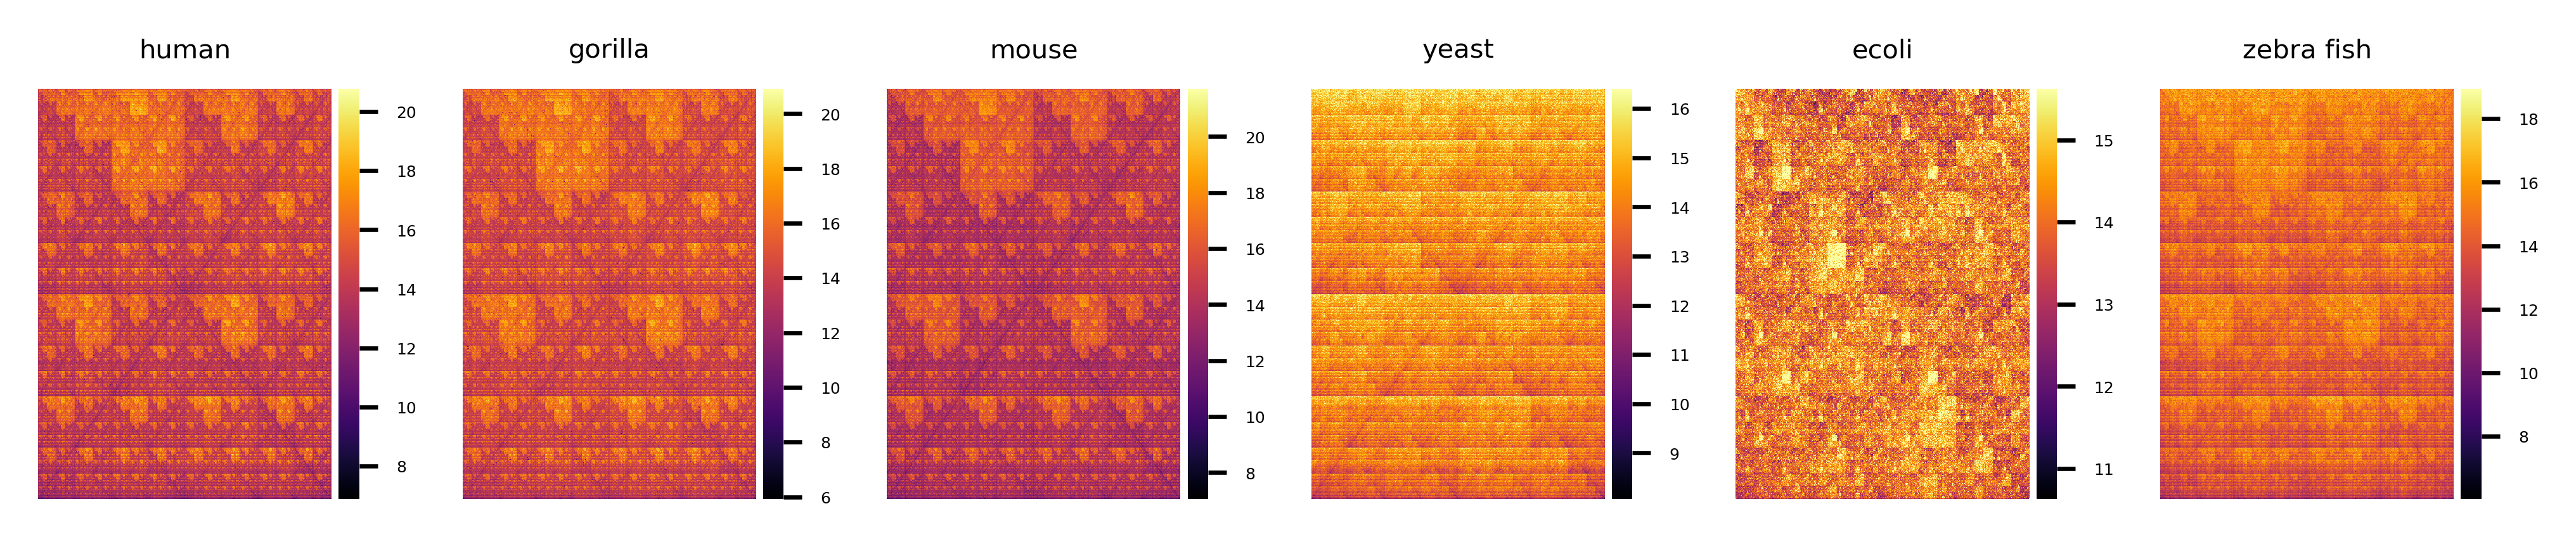

In [25]:
fig, ax = plt.subplots(1, 6, dpi = 600, figsize =(8.4, 1.4))
counter = 0
species = df[[ 'human', 'gorilla',  'mouse', 'yeast', 'ecoli', 'zebra fish']].columns.tolist()

for i in range(6):
    # for j in range(3):
        # print(species[counter])
    heatmap = sns.heatmap(np.array(df[species[counter]]).reshape(1024,1024), ax=ax[i], cmap= "inferno", cbar_kws={'orientation': 'vertical', 'pad': 0.02})
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_title(str(species[counter]))
    ax[i].tick_params(axis='x', labelsize=4, rotation=90)
    ax[i].tick_params(axis='y', labelsize=4)
    ax[i].tick_params(axis='both', which='both', width=0.5)
    ax[i].xaxis.label.set_fontsize(4)
    ax[i].yaxis.label.set_fontsize(4)
    ax[i].title.set_fontsize(5)

    cbar = heatmap.collections[0].colorbar
    cbar.ax.yaxis.set_tick_params(labelsize=3)

    del cbar

    counter= counter+1

# plt.savefig("Multispecies_heatmap.png", dpi = 600)